Resuelve el Caso 1 de la sección de recursos. Proporciona un archivo PDF reportando las siguientes secciones:

- Definición del problema
- Modelo matemático
- Código en Python que lo resuelve
- Pantalla de ejecución donde se presente claramente el resultado
- Interpretación de la decisión preescrita por el modelo de decisión

**Mezcla de Combustibles con Restricciones Ambientales y de Producción**

**Una refinería produce gasolina mezclando dos tipos de combustibles:**

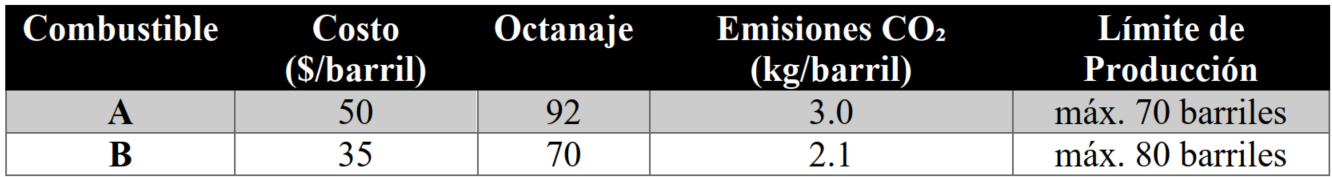

El objetivo es producir 95 barriles de gasolina a costo mínimo, cumpliendo las siguientes condiciones:

- Octanaje promedio mínimo de 80.
- Límite total de emisiones: máximo 275 kg de CO₂.
- Respetar las capacidades máximas de producción de A y B.

Ya abierto un barril de A o B debe aprovecharse en su totalidad. No se permiten fracciones de barriles. (enteros)

## 🔧 Modelo Matemático — Mezcla de Combustibles con Restricciones Ambientales

### 🔸 Variables de decisión

- $x_A$: Número entero de barriles de **Combustible A** a utilizar.  
- $x_B$: Número entero de barriles de **Combustible B** a utilizar.

### 🔸 Función Objetivo

Minimizar el costo total de producción:

$$
\min Z = 50x_A + 35x_B
$$

### 🔸 Restricciones

1. **Producción total requerida:**

$$
x_A + x_B = 95
$$

2. **Octanaje promedio mínimo de 80:**

El octanaje promedio es:

$$
\frac{92x_A + 70x_B}{x_A + x_B} \geq 80
$$

Multiplicando ambos lados por $(x_A + x_B)$:

$$
92x_A + 70x_B \geq 80(x_A + x_B)
$$

Simplificando:

$$
12x_A - 10x_B \geq 0
$$

3. **Emisiones totales de CO₂ limitadas a 275 kg:**

$$
3.0x_A + 2.1x_B \leq 275
$$

4. **Límites de producción:**

$$
0 \leq x_A \leq 70 \\
0 \leq x_B \leq 80
$$

5. **Condición de integralidad:**

$$
x_A, x_B \in \mathbb{Z}_{\geq 0}
$$


In [3]:
from pyomo.environ import *

# Crear el modelo
model = ConcreteModel()

# Variables de decisión: enteras y no negativas
model.x_A = Var(within=NonNegativeIntegers, bounds=(0, 70))
model.x_B = Var(within=NonNegativeIntegers, bounds=(0, 80))

# Función objetivo: minimizar el costo total
model.obj = Objective(expr=50 * model.x_A + 35 * model.x_B, sense=minimize)

# Restricción de mezcla total
model.total_production = Constraint(expr=model.x_A + model.x_B == 95)

# Restricción de octanaje
model.octane = Constraint(expr=12 * model.x_A - 10 * model.x_B >= 0)

# Restricción de emisiones
model.emissions = Constraint(expr=3.0 * model.x_A + 2.1 * model.x_B <= 275)

# Resolver el modelo
solver = SolverFactory('glpk')  # Puedes usar 'cbc' si lo tienes
results = solver.solve(model)

# Mostrar resultados
print("Estado de la solución:", results.solver.status)
print("Costo mínimo: $", value(model.obj))
print("Barriles de A:", value(model.x_A))
print("Barriles de B:", value(model.x_B))


Estado de la solución: ok
Costo mínimo: $ 3985.0
Barriles de A: 44.0
Barriles de B: 51.0
